In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyComplexHeatmap as pch
import scanpy as sc
import squidpy as sq
from tqdm import tqdm
import sys
sys.path.append('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/Projects-AkdemirLab/pipelines/PyUtils')
import xenium_pyutils
import sys
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [9]:
plot_dir = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.2/plots'


In [10]:
wt_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.1/data/wt_adata_p52P_filtered.h5ad')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MES-like_linearAmp vs. MES-like_ecDNA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.587e-02 U_stat=0.000e+00
Pericyte_linearAmp vs. Pericyte_ecDNA: Mann-Whitney-Wilcoxon test two-sided, P_val:3.175e-02 U_stat=1.000e+00


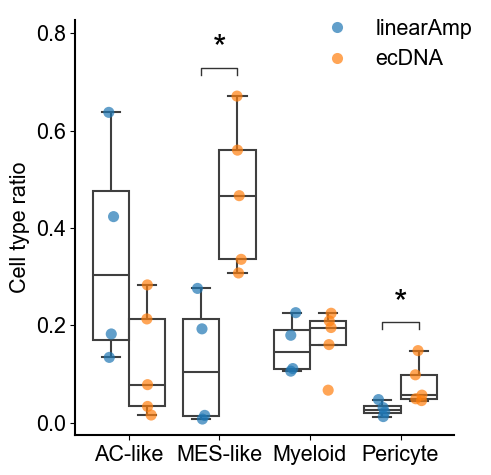

In [11]:
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

### Figure 6D

cell_type_counts = wt_adata.obs.groupby(['sample_2', 'cell_type_final']).size().unstack(fill_value=0)
cell_type_ratios = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)
plot_df = cell_type_ratios.copy()
plot_df['subtype'] = np.where(plot_df.index.isin(['p19P', 'p51P', 'p52P','p67P']), 'linearAmp', 
                                np.where(plot_df.index.isin(['p15P', 'p29P', 'p46P','p55P', 'p59P']), 'ecDNA', 'other'))
# Define the order of subtypes
pdf = plot_df.reset_index().rename(columns={'sample_2':'sample'}).melt(id_vars=['sample', 'subtype'], var_name='cell_type', value_name='ratio')
pdf = pdf[pdf['subtype']!='other']
pdf['subtype'] = pd.Categorical(pdf['subtype'], categories=['linearAmp', 'ecDNA'], ordered=True)

# Perform Wilcoxon test for each cell type between linearAmp and ecDNA
# p_values = {}
# for cell_type in selected_celltypes:
#     group1 = pdf[(pdf['cell_type'] == cell_type) & (pdf['subtype'] == 'linearAmp')]['ratio']
#     group2 = pdf[(pdf['cell_type'] == cell_type) & (pdf['subtype'] == 'ecDNA')]['ratio']
#     stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
#     p_values[cell_type] = p_value

# print(p_values)

plt.style.use('default')
plt.rcParams.update({'font.family': 'Arial', 'font.size': 15.5})

fig, ax1 = plt.subplots(1, 1, figsize=(5.2,5))
line_width = 1.5

# Plot for selected cell types
selected_celltypes = ['AC-like', 'MES-like', 'Myeloid', 'Pericyte']
main_pdf = pdf[pdf['cell_type'].isin(selected_celltypes)]
# Remove unused levels from subtype categorical
main_pdf['cell_type'] = pd.Categorical(main_pdf['cell_type'], categories=selected_celltypes, ordered=True)

sns.boxplot(data=main_pdf, 
            x='cell_type', y='ratio', hue='subtype', showfliers=False, legend=False,
            boxprops={'facecolor': 'None', 'linewidth': line_width},
            whiskerprops={'linewidth': line_width},
            capprops={'linewidth': line_width},
            medianprops={'linewidth': line_width},
            ax=ax1)
sns.stripplot(data=main_pdf, 
              x='cell_type', y='ratio', hue='subtype', dodge=True, marker='o', alpha=0.7, size=8, ax=ax1)

# Add significance stars
box_pairs = [(('AC-like', 'linearAmp'), ('AC-like', 'ecDNA')),
             (('MES-like', 'linearAmp'), ('MES-like', 'ecDNA')),
             (('Myeloid', 'linearAmp'), ('Myeloid', 'ecDNA')),
             (('Pericyte', 'linearAmp'), ('Pericyte', 'ecDNA'))]
annotator = Annotator(ax1, data=main_pdf, pairs = box_pairs, x='cell_type', y='ratio', hue='subtype')
annotator.configure(test='Mann-Whitney', text_format='star', line_width=1, loc='inside', hide_non_significant=True, fontsize=25)
annotator.apply_and_annotate()

ax1.set_ylabel('Cell type ratio')
ax1.set_xlabel('')
ax1.set_yticks(np.arange(0, 0.81, 0.2))
sns.despine(ax=ax1, top=True, right=True)
ax1.legend(title='', bbox_to_anchor=(1.1, 1.05), frameon=False)

# Increase the spine linewidth
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
plt.tight_layout()
plt.show()

fig.savefig(f'{plot_dir}/Figure6D.png', dpi=300, bbox_inches='tight')





p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MES-like_linearAmp vs. MES-like_ecDNA: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=8.120e+07
AC-like_linearAmp vs. AC-like_ecDNA: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.509e+08
MES-like_linearAmp.vs.ecDNA:  0.0
AC-like_linearAmp.vs.ecDNA:  0.0
AC-like.vs.MES-like_linearAmp:  0.0
AC-like.vs.MES-like_ecDNA:  0.0


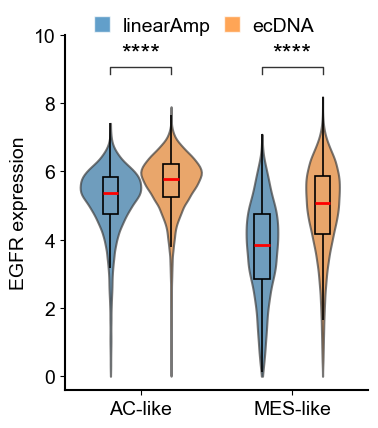

In [19]:
## Fig 6F
mixed_data = pd.concat([ac_like_data, mes_like_data])
# Create figure for comparison
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14})
fig, ax = plt.subplots(figsize=(4, 4.5))
# Fix the plot order
mixed_data['egfr_status'] = mixed_data['egfr_status'].replace({'WT-EGFRamp': 'linearAmp', 'WT-ecEGFR': 'ecDNA'})
mixed_data['egfr_status'] = pd.Categorical(mixed_data['egfr_status'], categories=['linearAmp', 'ecDNA'], ordered=True)
# Create violin plot with box plot inside
sns.violinplot(data=mixed_data, x='cell_type', y='EGFR', hue='egfr_status', 
               split=False, inner=None, palette='tab10', alpha=0.7,
               cut=0, linewidth=1.5, ax=ax)

# Add significance stars
box_pairs = [(('AC-like', 'linearAmp'), ('AC-like', 'ecDNA')),
             (('MES-like', 'linearAmp'), ('MES-like', 'ecDNA'))]
annotator = Annotator(ax, data=mixed_data, pairs=box_pairs, x='cell_type', y='EGFR', hue='egfr_status')
annotator.configure(test='Mann-Whitney', text_format='star', line_width=1, 
                    loc='outside', hide_non_significant=True, 
                    fontsize=18)
annotator.apply_and_annotate()

# Add individual data points with jitter
# Add a boxplot inside but with clean styling
# Define hue categories and spacing
hue_order = ['linearAmp', 'ecDNA']  # Keep the same order as in the violin plot
n_hues = len(hue_order)
offsets = np.linspace(-0.2, 0.2, n_hues)  # Adjust spacing

# Get x positions for cell types
x_pos = np.arange(len(ax.get_xticks()))

# Adjust positions manually for each hue category
for i, hue in enumerate(hue_order):
    subset = mixed_data[mixed_data['egfr_status'] == hue]
    for j, cell_type in enumerate(subset['cell_type'].unique()):
        sns.boxplot(data=subset[subset['cell_type'] == cell_type], x='cell_type', y='EGFR',
                    width=0.1, showcaps=False, showfliers=False,
                    boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 1.2},
                    whiskerprops={'color': 'black', 'linewidth': 1.2},
                    medianprops={'color': 'red', 'linewidth': 2},
                    saturation=0.5, ax=ax,
                    positions=[x_pos[j] + offsets[i]])  # Apply manual offset
# Improve styling
ax.set_xlabel('')
ax.set_ylabel('EGFR expression')
ymin, _ = ax.get_ylim()
ax.set_ylim(ymin, 10)
# Create custom legend handles with square markers
legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markersize=11, markerfacecolor=plt.cm.tab10(ccode_1), alpha=0.7, label='linearAmp'),
    plt.Line2D([0], [0], marker='s', color='w', markersize=11, markerfacecolor=plt.cm.tab10(ccode_2), alpha=0.7, label='ecDNA')
]
ax.legend(handles=legend_handles, title='', bbox_to_anchor=(0, 1.1), loc='upper left', 
          frameon=False, ncol=2, 
          columnspacing=0.1, handletextpad=0.05)

sns.despine(top=True, right=True)
# Increase spine linewidth for better visibility
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
# Save the figure
plt.savefig(f'{plot_dir}/Figure6F_violin_with_points.png', dpi=300, bbox_inches='tight')

egframp_mes_like = mixed_data[(mixed_data['egfr_status'] == 'linearAmp')&(mixed_data['cell_type'] == 'MES-like')]['EGFR'].tolist()
wt_ecEGFR_mes_like = mixed_data[(mixed_data['egfr_status'] == 'ecDNA')&(mixed_data['cell_type'] == 'MES-like')]['EGFR'].tolist()
stat_mes, p_value_mes = mannwhitneyu(egframp_mes_like, wt_ecEGFR_mes_like)
print('MES-like_linearAmp.vs.ecDNA: ', p_value_mes)

egframp_ac_like = mixed_data[(mixed_data['egfr_status'] == 'linearAmp')&(mixed_data['cell_type'] == 'AC-like')]['EGFR'].tolist()
wt_ecEGFR_ac_like = mixed_data[(mixed_data['egfr_status'] == 'ecDNA')&(mixed_data['cell_type'] == 'AC-like')]['EGFR'].tolist()
stat_ac, p_value_ac = mannwhitneyu(egframp_ac_like, wt_ecEGFR_ac_like)
print('AC-like_linearAmp.vs.ecDNA: ', p_value_ac)

# Perform Wilcoxon test between linearAmp AC-like and linearAmp MES-like
wt_ac_like = mixed_data[(mixed_data['egfr_status'] == 'linearAmp')&(mixed_data['cell_type'] == 'AC-like')]['EGFR'].tolist()
wt_mes_like = mixed_data[(mixed_data['egfr_status'] == 'linearAmp')&(mixed_data['cell_type'] == 'MES-like')]['EGFR'].tolist()
stat_ac_vs_mes, p_value_ac_vs_mes = mannwhitneyu(wt_ac_like, wt_mes_like)
print('AC-like.vs.MES-like_linearAmp: ', p_value_ac_vs_mes)

# Perform Wilcoxon test between ecDNA AC-like and ecDNA MES-like
wt_ecEGFR_ac_like = mixed_data[(mixed_data['egfr_status'] == 'ecDNA')&(mixed_data['cell_type'] == 'AC-like')]['EGFR'].tolist()
wt_ecEGFR_mes_like = mixed_data[(mixed_data['egfr_status'] == 'ecDNA')&(mixed_data['cell_type'] == 'MES-like')]['EGFR'].tolist()
stat_ecEGFR_ac_vs_mes, p_value_ecEGFR_ac_vs_mes = mannwhitneyu(wt_ecEGFR_ac_like, wt_ecEGFR_mes_like)
print('AC-like.vs.MES-like_ecDNA: ', p_value_ecEGFR_ac_vs_mes)
